In [3]:
# numerical calculation & data frames
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

# statistics
import statsmodels.api as sm

# pandas options
pd.set_option('mode.copy_on_write', True)  # pandas 2.0
pd.options.display.float_format = '{:.2f}'.format  # pd.reset_option('display.float_format')
pd.options.display.max_rows = 7  # max number of rows to display

# NumPy options
np.set_printoptions(precision = 2, suppress=True)  # suppress scientific notation

# For high resolution display
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats("retina")

In [5]:
# Load the nycflight13 dataset
flights = sm.datasets.get_rdataset("flights", "nycflights13").data.drop(columns="time_hour")
flights

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute
0,2013,1,1,517.00,515,2.00,830.00,819,11.00,UA,1545,N14228,EWR,IAH,227.00,1400,5,15
1,2013,1,1,533.00,529,4.00,850.00,830,20.00,UA,1714,N24211,LGA,IAH,227.00,1416,5,29
2,2013,1,1,542.00,540,2.00,923.00,850,33.00,AA,1141,N619AA,JFK,MIA,160.00,1089,5,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,3461,N535MQ,LGA,BNA,NaN,764,12,10
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,3572,N511MQ,LGA,CLE,NaN,419,11,59
336775,2013,9,30,NaN,840,NaN,NaN,1020,NaN,MQ,3531,N839MQ,LGA,RDU,NaN,431,8,40


# A

In [7]:
# arr_delay 2시간 이상인 걸 가져오기
flights.query(f"arr_delay >= 120")
# flights[flights.arr_delay >= 120]

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute
119,2013,1,1,811.00,630,101.00,1047.00,830,137.00,MQ,4576,N531MQ,LGA,CLT,118.00,544,6,30
151,2013,1,1,848.00,1835,853.00,1001.00,1950,851.00,MQ,3944,N942MQ,JFK,BWI,41.00,184,18,35
218,2013,1,1,957.00,733,144.00,1056.00,853,123.00,UA,856,N534UA,EWR,BOS,37.00,200,7,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336724,2013,9,30,2053.00,1815,158.00,2310.00,2054,136.00,EV,5292,N600QX,EWR,ATL,91.00,746,18,15
336757,2013,9,30,2159.00,1845,194.00,2344.00,2030,194.00,9E,3320,N906XJ,JFK,BUF,50.00,301,18,45
336763,2013,9,30,2235.00,2001,154.00,59.00,2249,130.00,B6,1083,N804JB,JFK,MCO,123.00,944,20,1


In [14]:
# 휴스턴(IAH 또는 HOU)으로 비행
flights.query('dest == "IAH" or dest == "HOU"')
# flights.query('dest == "IAH" | dest == "HOU"').head(3)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute
0,2013,1,1,517.00,515,2.00,830.00,819,11.00,UA,1545,N14228,EWR,IAH,227.00,1400,5,15
1,2013,1,1,533.00,529,4.00,850.00,830,20.00,UA,1714,N24211,LGA,IAH,227.00,1416,5,29
32,2013,1,1,623.00,627,-4.00,933.00,932,1.00,UA,496,N459UA,LGA,IAH,229.00,1416,6,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336618,2013,9,30,1859.00,1859,0.00,2134.00,2159,-25.00,UA,1128,N14731,LGA,IAH,180.00,1416,18,59
336694,2013,9,30,2015.00,2015,0.00,2244.00,2307,-23.00,UA,1545,N17730,EWR,IAH,174.00,1400,20,15
336737,2013,9,30,2105.00,2106,-1.00,2329.00,2354,-25.00,UA,475,N477UA,EWR,IAH,175.00,1400,21,6


In [15]:
# 여름 출발(7, 8, 9월)
flights.query('month in [7, 8, 9]')

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute
250450,2013,7,1,1.00,2029,212.00,236.00,2359,157.00,B6,915,N653JB,JFK,SFO,315.00,2586,20,29
250451,2013,7,1,2.00,2359,3.00,344.00,344,0.00,B6,1503,N805JB,JFK,SJU,200.00,1598,23,59
250452,2013,7,1,29.00,2245,104.00,151.00,1,110.00,B6,234,N348JB,JFK,BTV,66.00,266,22,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,3461,N535MQ,LGA,BNA,NaN,764,12,10
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,3572,N511MQ,LGA,CLE,NaN,419,11,59
336775,2013,9,30,NaN,840,NaN,NaN,1020,NaN,MQ,3531,N839MQ,LGA,RDU,NaN,431,8,40


In [ ]:
# 2시간 넘게 늦게 도착했지만 늦게 출발하지는 않았습니다
flights.query('arr_delay > 120 and dep_delay <= 0')

In [16]:
# 출발할 때 예정시간보다 1시간 이상 지연되어 출발하였으나 빠르게 비행하여 출발 지연된 시간보다 도착 지연이 30분이상 단축된 항공편들입니다.
flights.query('dep_delay > 60 and dep_delay - arr_delay >= 30')

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute


In [19]:
flights.hour.unique()

array([ 5,  6,  7,  8, 18,  9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21,
       22, 23,  1])

In [20]:
# # 자정부터 오전 6시 사이에 출발(포함)
flights.query('hour >= 0 and hour <= 6')
# #flights.query('dep_time >= 0 & dep_time <= 600').head(3)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute
0,2013,1,1,517.00,515,2.00,830.00,819,11.00,UA,1545,N14228,EWR,IAH,227.00,1400,5,15
1,2013,1,1,533.00,529,4.00,850.00,830,20.00,UA,1714,N24211,LGA,IAH,227.00,1416,5,29
2,2013,1,1,542.00,540,2.00,923.00,850,33.00,AA,1141,N619AA,JFK,MIA,160.00,1089,5,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335905,2013,9,30,734.00,652,42.00,1001.00,954,7.00,UA,1439,N68452,EWR,LAX,297.00,2454,6,52
335986,2013,9,30,827.00,615,132.00,1022.00,811,131.00,US,1772,N556UW,JFK,CLT,91.00,541,6,15
336027,2013,9,30,858.00,659,119.00,1139.00,955,104.00,UA,537,N421UA,EWR,PBI,130.00,1023,6,59


In [21]:
# 가장 빠른 항공편 찾기
flights.assign(
    speed = lambda df: df.distance / (df.air_time)
).sort_values("speed", ascending=False).head(3)


,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,speed
216447,2013,5,25,1709.00,1700,9.00,1923.00,1937,-14.00,DL,1499,N666DN,LGA,ATL,65.00,762,17,0,11.72
251999,2013,7,2,1558.00,1513,45.00,1745.00,1719,26.00,EV,4667,N17196,EWR,MSP,93.00,1008,15,13,10.84
205388,2013,5,13,2040.00,2025,15.00,2225.00,2226,-1.00,EV,4292,N14568,EWR,GSP,55.00,594,20,25,10.80


In [24]:
# 예정시간보다 가장 늦게 출발한 항공편
flights.sort_values("dep_delay", ascending=False).head(3)

# 예정시간보다 가장 일찍 출발한 항공편
# flights.sort_values(by="dep_delay", ascending=True).head(3)

        year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
89673   2013     12    7   2040.00            2123     -43.00     40.00   
113633  2013      2    3   2022.00            2055     -33.00   2240.00   
64501   2013     11   10   1408.00            1440     -32.00   1549.00   

        sched_arr_time  arr_delay carrier  flight tailnum origin dest  \
89673             2352      48.00      B6      97  N592JB    JFK  DEN   
113633            2338     -58.00      DL    1715  N612DL    LGA  MSY   
64501             1559     -10.00      EV    5713  N825AS    LGA  IAD   

        air_time  distance  hour  minute  
89673     265.00      1626    21      23  
113633    162.00      1183    20      55  
64501      52.00       229    14      40  


In [27]:
# 가장 길게 여행한 항공편
flights.sort_values('distance', ascending=False).head(3)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute
50676,2013,10,26,1004.00,1000,4.00,1435.00,1450,-15.00,HA,51,N386HA,JFK,HNL,608.00,4983,10,0
108078,2013,12,28,933.00,930,3.00,1520.00,1535,-15.00,HA,51,N384HA,JFK,HNL,633.00,4983,9,30
100067,2013,12,19,924.00,930,-6.00,1450.00,1535,-45.00,HA,51,N386HA,JFK,HNL,609.00,4983,9,30


In [28]:
# 가장 짧게 여행한 항공편
flights.sort_values("distance").head(3)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute
275945,2013,7,27,NaN,106,NaN,NaN,245,NaN,US,1632,NaN,EWR,LGA,NaN,17,1,6
3083,2013,1,4,1240.00,1200,40.00,1333.00,1306,27.00,EV,4193,N14972,EWR,PHL,30.00,80,12,0
16328,2013,1,19,1617.00,1617,0.00,1722.00,1722,0.00,EV,4616,N12540,EWR,PHL,34.00,80,16,17


In [33]:
# 10. 각 도착지로 출항하는 항공편이 1년 중 몇 일 있는가?
(
    flights.groupby(["month", "day", "dest"])
    .size()
    .reset_index(name='n')
    .groupby(['dest'])
    .size()
)

dest
ABQ    254
ACK    155
ALB    260
      ... 
TVC     37
TYS    322
XNA    314
Length: 105, dtype: int64

In [37]:
# 11. 1년 중 300일 이상 출항하는 도착지들을 구하면?
(
    flights.groupby(["month", "day", "dest"])
    .size()
    .reset_index(name='n')
    .groupby(['dest'])
    .size()
    .reset_index(name='n')
    .query("n >= 300")
)

,dest,n
4,ATL,365
5,AUS,365
10,BNA,365
...,...,...
101,TUL,314
103,TYS,322
104,XNA,314


# B

In [42]:
# 1. 출발 지연과 도착 지연이 null인 값을 찾아라
flights.query('dep_delay.isna() and arr_delay.isna()').head(3)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute
838,2013,1,1,NaN,1630,NaN,NaN,1815,NaN,EV,4308,N18120,EWR,RDU,NaN,416,16,30
839,2013,1,1,NaN,1935,NaN,NaN,2240,NaN,AA,791,N3EHAA,LGA,DFW,NaN,1389,19,35
840,2013,1,1,NaN,1500,NaN,NaN,1825,NaN,AA,1925,N3EVAA,LGA,MIA,NaN,1096,15,0


In [ ]:
# 출발지연은 missing이 아니나 도작지연은 missing인 것이 있음.
# 아마도 도착지연이 missing인 경우는 결항은 아니고, 출발지연이 missing인 것이 결항된 항공편이라고 볼 수 있음. (출발지연이 missing이면 도착지연도 missing이므로)
# 도착지연이 더 중요한 지표일 것임; 연결된 항공편을 놓칠 수 있기 때문에. 출발지연은 오히려 좋을 수도..

In [51]:
# 2. 하루에 cancel된 개수를 구해라
cancelled_per_day = (
    flights.assign(
        cancelled = lambda x: x.dep_delay.isna() | x.arr_delay.isna())
    )

cancelled_per_day = (
    cancelled_per_day
    .groupby(['month', 'day'])['cancelled']
    .agg(['sum', 'count'])
    .reset_index()
)
cancelled_per_day

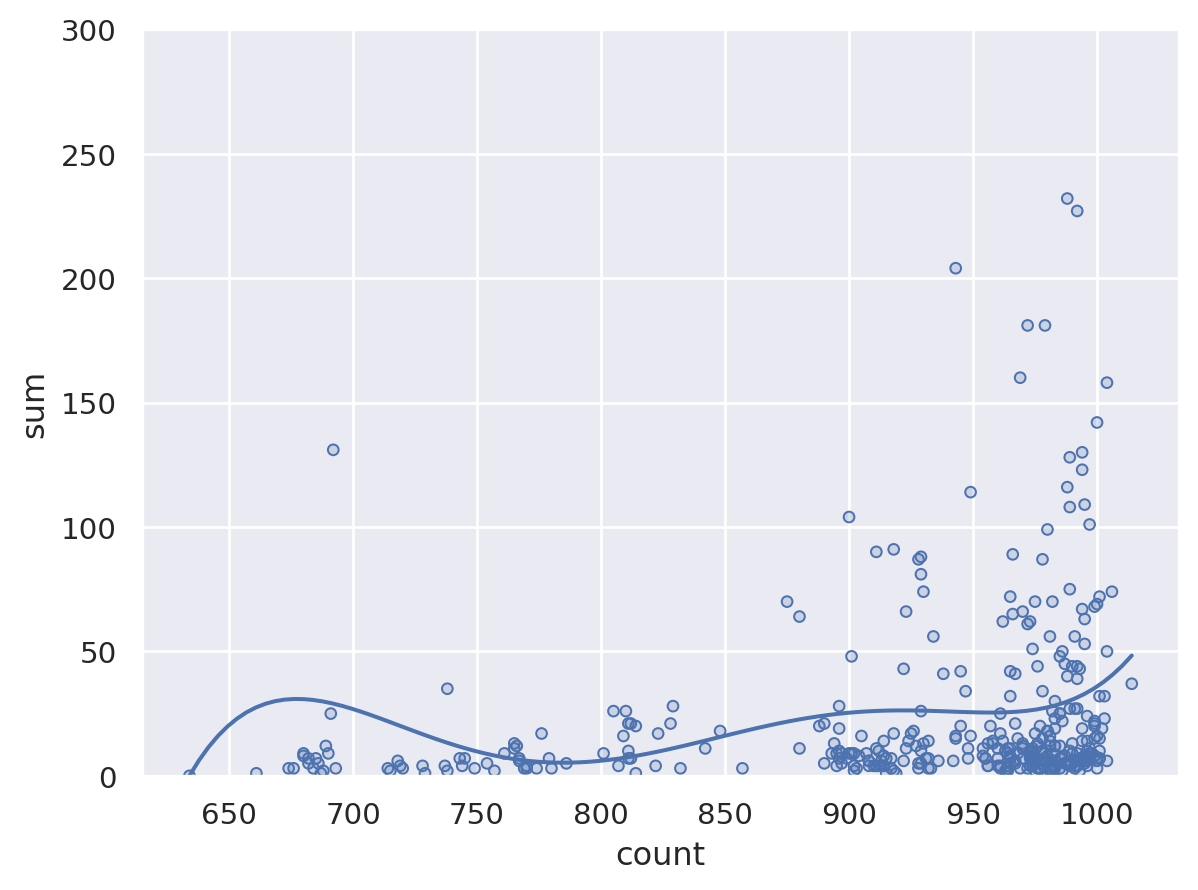

In [54]:
(
    so.Plot(cancelled_per_day, x = 'count', y = 'sum')
    .add(so.Dots())
    .add(so.Line(), so.PolyFit(5))
    .limit(y = (0, 300))
    )


In [ ]:
# 출항한 항공편이 많을수록 결항편도 많음.. 당연? 선형관계?  >> 결항 비율로
#